In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as st

1. Gere um relatório em pdf, de estatística descritiva dos seus dados, contemplando:
1.1. Uma seção sobre análise univariada, em que incluirá distribuições de frequência para uma variável qualitativa e uma quantitativa;
1.2. Uma seção sobre gráficos univariados para ao menos uma variável de cada tipo (qualitativa nominal, qualitativa  ordinal, quantitativa discreta, quantitativa contínua);
1.3. Uma seção sobre análise bivariada, com ao menos uma distribuição de frequências e uma figura bivariadas;
1.4. Uma seção para medidas de posição (tendência central);
1.5. Uma seção sobre medidas de dispersão;
1.6. Em cada seção, interprete seus resultados, como se fossem verdadeiros, mesmo que sejam fictícios.
1.7. Sua equipe deverá recorrer a ferramentas informáticas para realização dos cálculos, das tabelas e figuras, bem como do próprio relatório.

# 0. Funções

In [3]:
def grafico_qualitativa(var,dataframe, ax=None):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     
     if ax is None:
          fig, ax = plt.subplots(figsize=(12, 4))
          
     dados_grafico = dataframe[var].value_counts()
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar', ax=ax)
     
     plt.xlabel('Valores')
     plt.ylabel('Frequência')
     plt.title(f'Gráfico da Frequência:{var}')

In [4]:
def distribuição_de_Frequência(varName,dataframe):
    x = dataframe[varName]
    n = len(x)
    sqrt_n = np.sqrt(n)
    k = round(sqrt_n)
    dfTempoFalha = x.value_counts(bins=k, 
                            sort=False)
    display(pd.DataFrame(dfTempoFalha))


In [5]:
def histograma(varName, dataframe):
    dados_quantitativa = dataframe[varName].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':varName})
    display(dados_quantitativa.head)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sn.histplot(dataframe[varName], color='b', bins=100, ax=axs[0])
    dataframe[varName].plot(kind='box', ax=axs[1], title='')
    axs[1].set_ylabel(varName)
    plt.tight_layout()
    plt.show()

In [6]:
def QualiQualiAssociation(varName1, varName2,dataframe, ax=None):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " +  varName1 
    print("******** " + title + " ********")
    display(SQ_tb)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    
    image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
    image.set_ylabel("%",fontsize=12)
    image.set_xlabel(varName1,fontsize=12)

In [7]:
def moda_czuber(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    freq_anterior = freq.get(moda - 1, 0)
    freq_posterior = freq.get(moda + 1, 0)

    amplitude = None
    if len(data) >= 2:
        sorted_data = sorted(data)
        amplitude = sorted_data[1] - sorted_data[0]

    if amplitude is not None:
        return moda + ((freq_posterior - freq_anterior) / (2 * freq_posterior - 2 * freq[moda])) * amplitude
    else:
        return moda


In [8]:

def measuresOfPositionAndDispersion(data,key):
    dataset = pd.DataFrame({"Variable": key ,"Amount": len(data),"Mean": [st.mean(data.dropna())], "Mode ": moda_czuber(data.dropna()), "Median": [st.median(data.dropna())], "Variance": [st.variance(data.dropna())], "Standard deviation": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

In [9]:
def qualitativaXquantativa(varName1,varName2,dataframe,ax = None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)
    sn.boxplot(data=dataframe, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())

## Estatistica descritiva

In [10]:
nome_arquivo_csv = 'train.csv'
dados = pd.read_csv(nome_arquivo_csv)

Aqui entendermos melhor as variaveis de maior interesse e como elas se relacionam. Elas serão dividas em duas categorias, serão variáveis qualitativas e quantitativas.Elas serão analisadas por meio de gráficos de forma que entendamos melhor seus comportamentos e suas frequências.  
As variáveis de interesse serão:  
* __gender__: O sexo genotípico do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização. 
 
As variáveis acima são qualitativas, veremos posteriormente se elas tem relação com a taxa de mortalidade. Elas foram escolhidas de modo a verificar se gênero, doenças e local de onde foram admitidas tem relação com morte.

__VARIAVEIS DE APACHE-III__
  
 Já as variáveis abaixo são qualitativas, serão analisadas para observar sua relação com a taxa de mortalidade, algumas delas foram escolihdas com base no diagnóstico APACHE-III pois são as categorias que mais pontuam nesse diagnóstico e assim podem ter grande interesse na taxa de mortalidade.  

* __heart_rate_apache__: A frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __temp_apache__: A temperatura medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __resprate_apache__: A frequência respiratória medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __map_apache__: A pressão arterial média medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.


## 1.Gráficos univariados para cada variável

Aqui serão analisadas uma variavel de cada tipo, sendo elas:
* icu_admit_source (qualitativa nominal)
*  (qualitativa  ordinal) 
*  age (quantitativa discreta)
*  apache_4a_icu_death_prob (quantitativa contínua)

 ### 1.1 icu_admit_source






 * A variavel icu_admit_source (qualitativa nominal) é a localizacao do paciiente antes de ser admitido na unidade.  
 Iremos agora analisar sua distribuição de frequência.

,icu_admit_source,Frequência
0,Accident & Emergency,0.590904
1,Operating Room / Recovery,0.203472
2,Floor,0.170516
3,Other Hospital,0.025391
4,Other ICU,0.009717


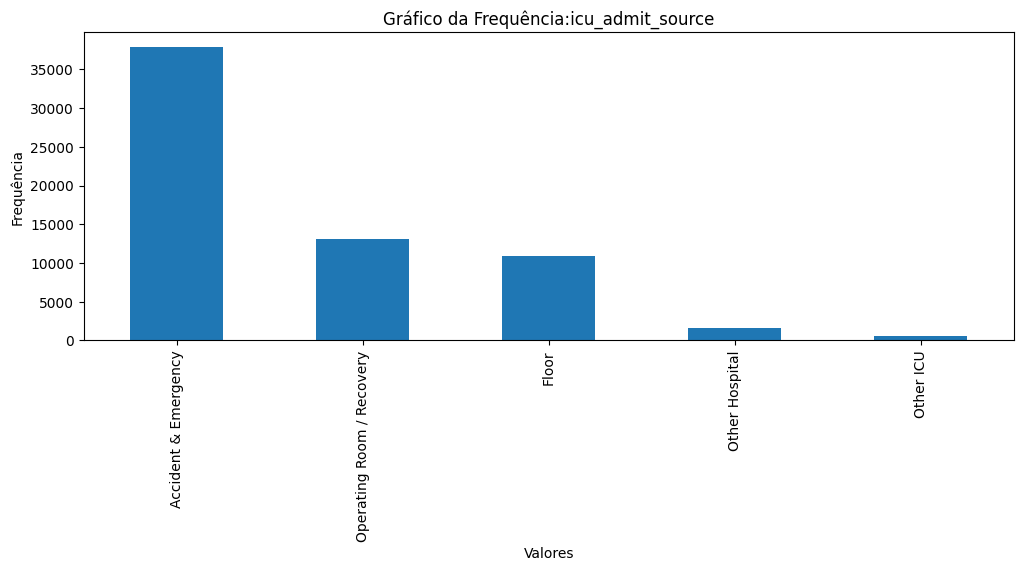

In [11]:

grafico_qualitativa("icu_admit_source", dados)

* Podemos perceber que a grande maioria dos pacientes vem de acidente e emergência sendo 59.01% dos pacientes vindo desta localização, seguido por sala de cirurgia e de recuperação que representa 20.35% dos pacientes e os pacientes vindos do andar representa 17.05%.  
já os pacientes de vindos de outra unidade hospitalar ou de outra UTI são os menores, representando juntos tem menos de 5% dos pacientes.  


### 1.2 
*  (qualitativa  ordinal) 

### 1.3 age



A variavel age(quantitativa discreta) é idade dos pacientnes que deram entrada na unidade hospitalar.

<bound method NDFrame.head of      age  Frequência
0   67.0    0.025618
1   68.0    0.024867
2   72.0    0.024409
3   71.0    0.024311
4   66.0    0.023936
..   ...         ...
69  20.0    0.003970
70  19.0    0.003823
71  18.0    0.003072
72  17.0    0.001291
73  16.0    0.000441

[74 rows x 2 columns]>

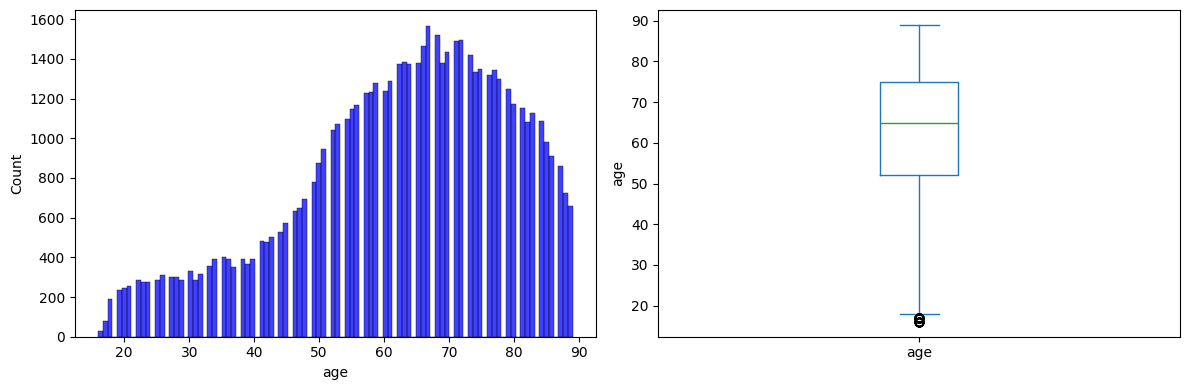

In [12]:
histograma("age", dados)

*  Pelo histograma apresentado podemos perceber que a grande maioria dos pacientes tem idade mais elevada, pelo gráfico apresentado e sua distribuição de frequência podemos ver que a maioria dos pacientes possuem idade superior a 55 anos e que pacientes com idade inferior a 40 representa uma minoria dos pacientes.  
Esta informação pode ser muito útil pois em muitas informações hospitalares podemos separar os pacientes em grupos etários.


### 1.4 apache_4a_icu_death_prob


* A variavel apache_4a_icu_death_prob (quantitativa contínua) é previsão probabilística APACHE IVa de mortalidade na UTI para o paciente que utiliza o escore APACHE III e outras covariáveis, incluindo diagnóstico.

<bound method NDFrame.head of     apache_4a_icu_death_prob  Frequência
0                       0.01    0.250776
1                       0.02    0.140285
2                       0.00    0.114160
3                       0.03    0.087523
4                       0.04    0.060169
..                       ...         ...
94                      0.92    0.000171
95                      0.94    0.000119
96                      0.95    0.000034
97                      0.96    0.000034
98                      0.97    0.000017

[99 rows x 2 columns]>

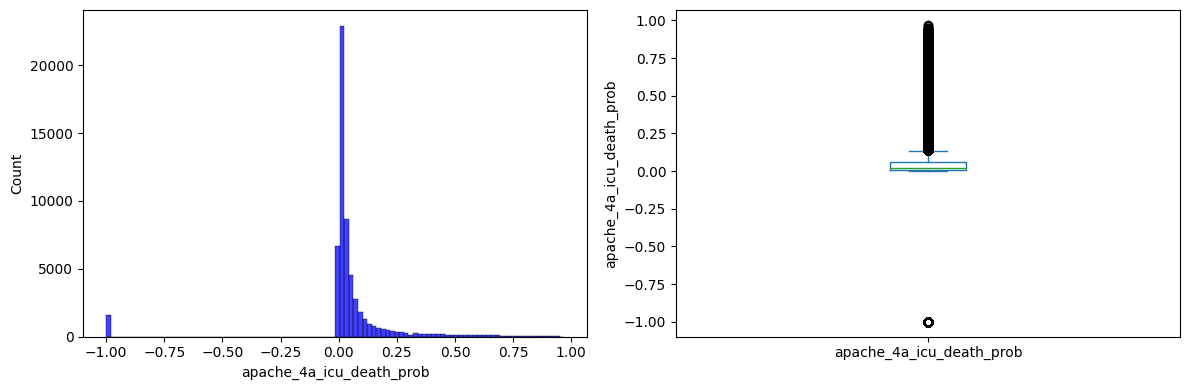

In [13]:
histograma("apache_4a_icu_death_prob", dados)

* Na análise do gráfico podemos ver vários pontos aberrantes , isso acontece pois a maioria dos pacientes tem uma probabilidade bem baixa de morrer estando entre 0 e 0.10% de probabilidade, os pacientes em geral estão longe do risco de morte e a população que tem uma alta probabilidade de morte é pequena.  
Assim, o gráfico considera aqueles acima dessa quantidade como pontos aberrantes mas podemos ver que há uma quantidade bem pequena de pessoas com probabilidade acima de 0.25, tambem podemos ver que há pontos aberrantes para baixo o que provavelmente representa um erro no conjuto de dados. 

## 2. Gráficos univariados e bivariados para qualitativas

Como ja mencionado as variáveis de interesse serão:  
* __gender__: O sexo genotípico do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização. 

A partir da análise dessas variáveis veremos quais delas impactam na mortalidade que é a condição que estamos interessados.

,gender,Frequência
0,M,0.538973
1,F,0.461027


******** Conditional Proportion: hospital_death per gender ********


hospital_death,0,1
gender,,
F,0.911899,0.088101
M,0.915303,0.084697


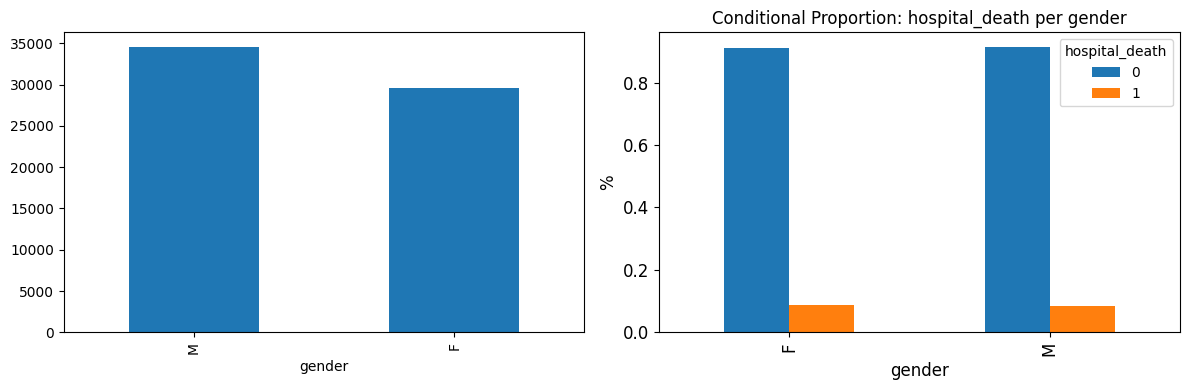

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("gender", dados, axs[0])
QualiQualiAssociation("gender","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Diante do gráfico podemos perceber que a quantidade de homens a entrar na UTI é um pouco maior do que as mulheres.  
A quantidade de homens é aproximadamente 7% maior, porém não tem interferência significativa nas mortalidade.  
Sendo a quantidade de mortes por genêro feminino de 8,81% e a de morte por genêro masculino de 8,47%.

,leukemia,Frequência
0,0.0,0.993044
1,1.0,0.006956


******** Conditional Proportion: hospital_death per leukemia ********


hospital_death,0,1
leukemia,,
0.0,0.914664,0.085336
1.0,0.819413,0.180587


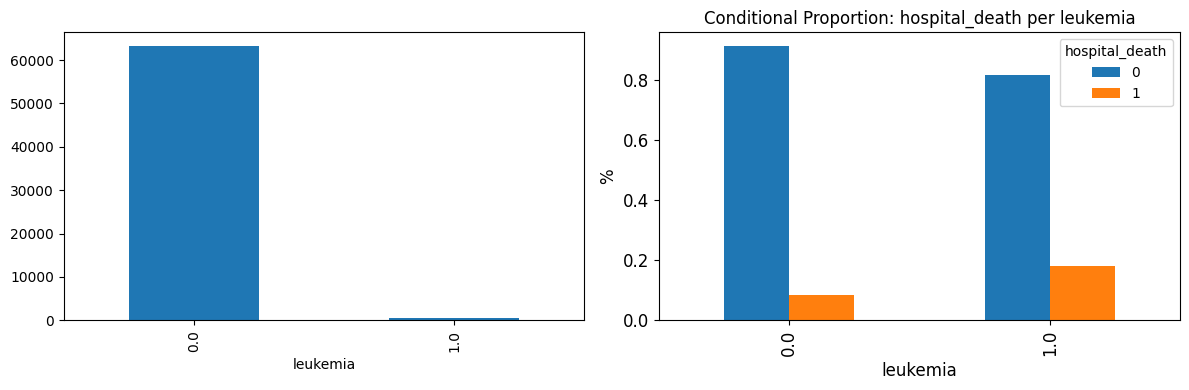

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("leukemia", dados, axs[0])
QualiQualiAssociation("leukemia","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já diante do gráfico univariado dos pacientes diagnosticados com leucemia vemos que somente 0,69% dos pacientes foram diagnosticados com essa condição, porém na análise do gráfico bivariado vemos uma interferência significativa na mortalidade.  
 Os pacientes que não foram diagnosticados com leucemia tem somente 8.53% na taxa de mortalidade enquanto os pacientes diagnosticados com leucemia tem 18.06% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.  
 Assim, pela análise obtida vemos que leucemia é uma variável de maior interesse por impactar na taxa de mortalidade. 

,diabetes_mellitus,Frequência
0,0.0,0.775967
1,1.0,0.224033


******** Conditional Proportion: hospital_death per diabetes_mellitus ********


hospital_death,0,1
diabetes_mellitus,,
0.0,0.911653,0.088347
1.0,0.922133,0.077867


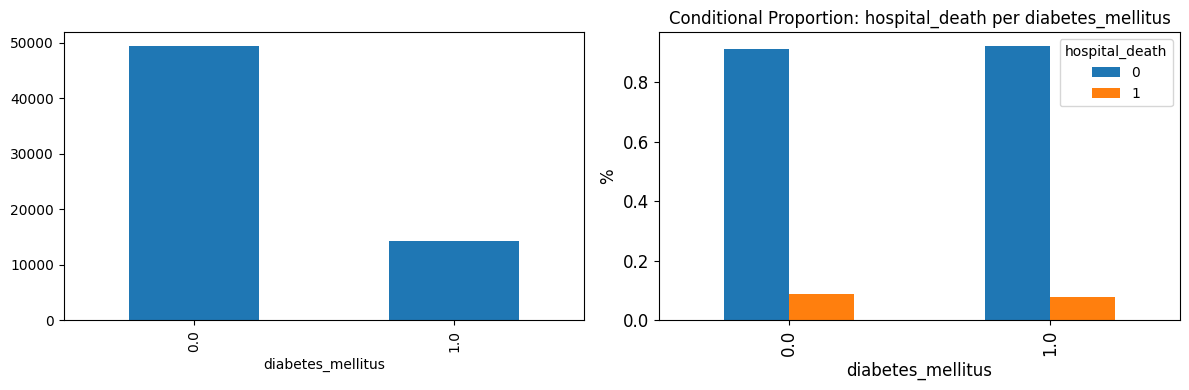

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("diabetes_mellitus", dados, axs[0])
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já na análise do gráfico univariado de pacientes com diabetes vemos que uma quantidade de 22.40% possuem a doença enquanto 77.60% não possuem essa condição.  
Contudo, no gráfico bivariado vemos que a diabete não tem grande inteferência na taxa de mortalidade.
Dos pacientes que morreram 8.83% não possuiam a doença enquanto 7.79% possuiam a doença.  
Sendo assim, pela análise obtida vemos que a diabete não é uma variável de interesse pois mesmo com uma população consideravel de diagnosticos positivos de pacientes vemos que ela não interfere na taxa de mortalidade. 


,solid_tumor_with_metastasis,Frequência
0,0.0,0.979541
1,1.0,0.020459


******** Conditional Proportion: hospital_death per solid_tumor_with_metastasis ********


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.915956,0.084044
1.0,0.820414,0.179586


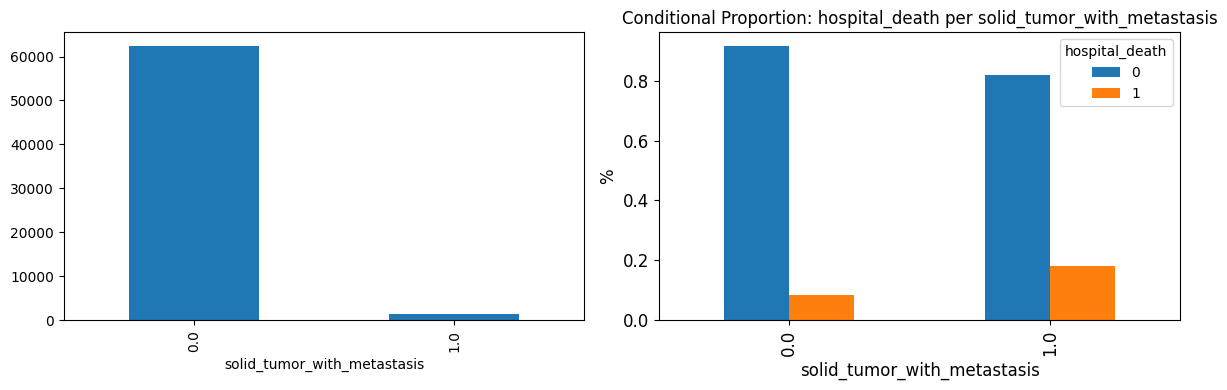

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("solid_tumor_with_metastasis", dados, axs[0])
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada dos pacientes que possuem ou não tumor sólido com metástase vemos que somente 2.04% possuem a doença enquanto 97,95% não possuem essa condição.  
Porém, na análise bivariada vemos que este tumor possui uma grande interferência na taxa de mortalidade.   
Os pacientes que não foram diagnosticados com tumor sólido com metástase tem somente 8.40% na taxa de mortalidade enquanto os pacientes diagnosticados com tumor sólido com metástase tem 17.96% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.  
Logo, pela análise obtida podemos ver que tumor sólido com metástase é uma variável de maior interesse por impactar na taxa de mortalidade. 

,icu_admit_source,Frequência
0,Accident & Emergency,0.590904
1,Operating Room / Recovery,0.203472
2,Floor,0.170516
3,Other Hospital,0.025391
4,Other ICU,0.009717


******** Conditional Proportion: hospital_death per icu_admit_source ********


hospital_death,0,1
icu_admit_source,,
Accident & Emergency,0.914007,0.085993
Floor,0.862984,0.137016
Operating Room / Recovery,0.963054,0.036946
Other Hospital,0.874079,0.125921
Other ICU,0.857143,0.142857


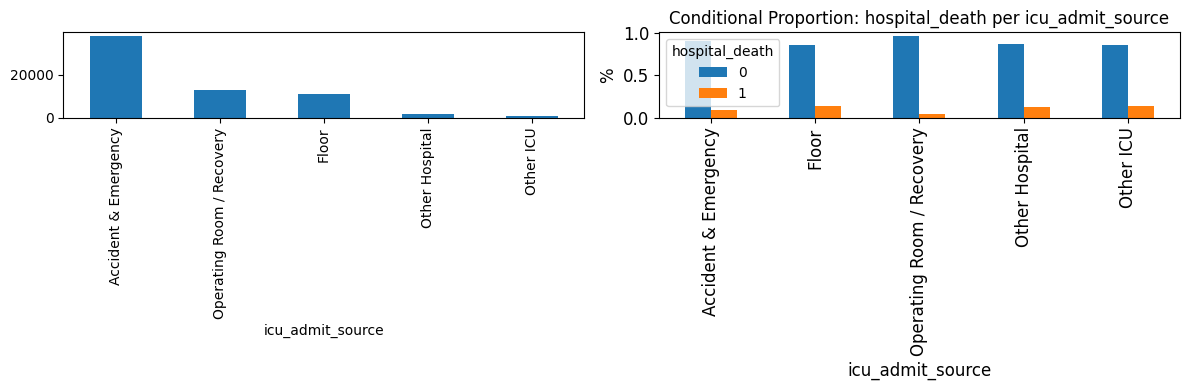

In [18]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("icu_admit_source", dados, axs[0])
QualiQualiAssociation("icu_admit_source","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada de localização do paciente antes de ser admitido na unidade vemos que a grande maioria dos pacientes vem da emergência e que a minoria vem de outras UTI´s e de outris hospital.   
Porém, na análise bivariada vemos que na taxa de mortalidade essas porcentagens se alteram.   
A localização que possui a maior porcentagem de mortalidade é dos pacientes vindos de outra UTI com 14.28% seguido por os pacientes vindos de outro hospital com 12.59% seguido por floor que possui 13.70%.  
Enquanto, a localização que possui a menor porcentagem de mortalidade é dos pacientes vindos sala de operação e recuperação com 03.69% e depois acidente e emergência com 08.60%.  
Portanto, podemos ver que os pacientes vindos de outra UTI e de outro hospital são as localizações de maior interesse por ter maior relação com a mortalidade.

Na análise de variáveis qualitativas podemos ver que as variáveis que mais afetam na taxa de mortalide e portanto as de maior interesse são:  
* os pacientes diagnosticados com leucemia.
* os pacientes diagnosticados com tumor solido com metastase.
* os pacientes  que dão entrada na UTI vindo de outra UTI.

## 3. Gráficos univariados e bivariados para quantitativas

### 3.0 Breve Introdução 

Como já mencionado analisaremos aqui algumas variaveis responsáveis por pontuar no apache-III.   
São elas:  
__resprate_apache__   
__map_apache__  
__temp_apache__   
__heart_rate_apache__  

Como as variáveis de interesse nos fornece valores de referencia por faixas etarias é importante analisar as medidas de posição e dispersão por idade. 

In [19]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56119.0,61.727917,16.866711,16.0,52.0,64.0,75.0,89.0
1,5087.0,68.585610,14.445924,16.0,60.0,71.0,80.0,89.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,58659,61.727917,67.0,64.0,284.485951,16.866711,73.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,5540,68.58561,78.195652,71.0,208.684716,14.445924,73.0


Pelos dados obtidos podemos dizer que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etaria e tambem os valores de referencia fornecidos pelo ministerio da saude.   
São eles:  
* Temperatura corporal: entre 35 º C e 36º C.  
* Frequência cardíaca (pulso): entre 60 e 90 bpm.  
* Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
* Respiração: entre 16 e 20 mrpm.  

### 3.1 heart_rate_apache (Frequência cardiaca)

<bound method NDFrame.head of      heart_rate_apache  Frequência
0                100.0    0.020417
1                102.0    0.019804
2                108.0    0.019709
3                104.0    0.019064
4                 98.0    0.019033
..                 ...         ...
143               72.0    0.000063
144               77.0    0.000063
145               76.0    0.000031
146               73.0    0.000031
147               75.0    0.000031

[148 rows x 2 columns]>

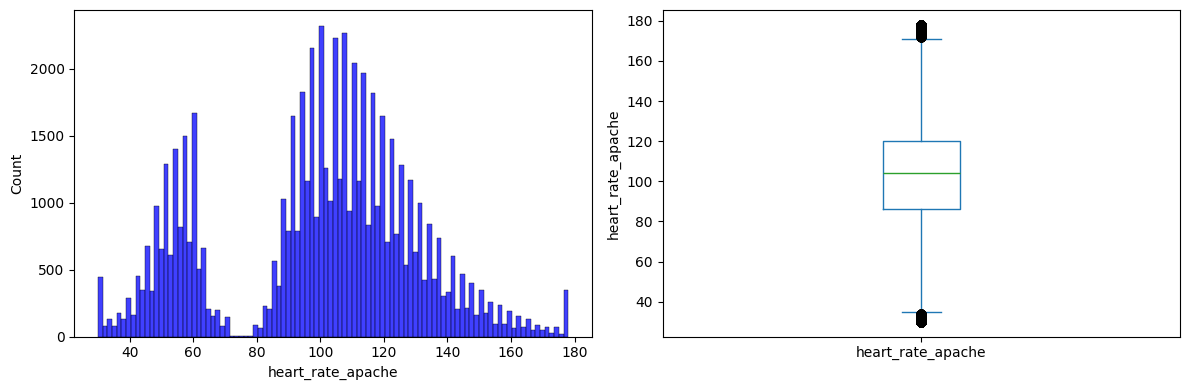

In [20]:
histograma("heart_rate_apache",dados)


* Por a análise do gráfico univariado de frequência cardíaca há uma concentração grande entre 45 e 60 bpm, mas que a maior concentração encontra-se entre 90 e 130.  
O gráfico em boxplot nos mostra que as medidas abaixo de 40 bpm e acima de 170 bpm já são considerados pontos aberrantes.  
Os valores esperados podem ser análisados de duas formas.  
Apartir das medidas de posição e dispersão vemos que a maioria dos pacientes estão acima dos 60 anos, portanto a frequência cardíaca esperada é entre 45 a 90 bpm.  
O Ministério da Saúde estabeleceu valores normais de referência entre 60 e 90 bpm.  
Assim, pela análise dessas duas referencias podemos perceber que a frequencia cardica dos pacientes em geral esta bastante elevada e tambem que não há muitos pacientes que estão dentro do intervalo considerado normal para frequência cardíaca.

heart_rate_apache                                            \
                           count        mean        std   min   25%    50%   
hospital_death                                                               
0                        58109.0   98.615739  30.339018  30.0  84.0  103.0   
1                         5465.0  110.411528  34.149646  30.0  96.0  115.0   

                              
                  75%    max  
hospital_death                
0               118.0  178.0  
1               133.0  178.0

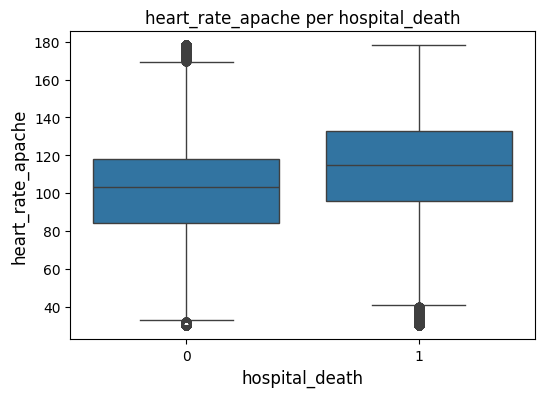

In [21]:
qualitativaXquantativa("heart_rate_apache","hospital_death",dados,ax=None)

* Análisando agora a frequência cardiaca das pessoas por morte obtemos dados interessantes.  
Os pacientes que vieram a obito tiveram uma frequência cardiaca maior e isso é observado tanto no gráfico quanto na tabela.  
Estes pacientes tem uma media mais elevada com aproximadamente 12 pontos a mais daqueles que não vieram a obito. Além disso, no gráfico podemos ver que os pacientes que morreram não possuem pontos aberrantes para cima.  
Nas duas categorias de pacientes observamos que amédia de frequência cardiaca era acima dos valores de referência.

### 3.2 map_apache (Pressão arterial)

<bound method NDFrame.head of      map_apache  Frequência
0          56.0    0.022950
1          54.0    0.021769
2          58.0    0.021328
3          60.0    0.021312
4          55.0    0.021139
..          ...         ...
156        87.0    0.000063
157        92.0    0.000047
158        90.0    0.000032
159        89.0    0.000032
160        88.0    0.000032

[161 rows x 2 columns]>

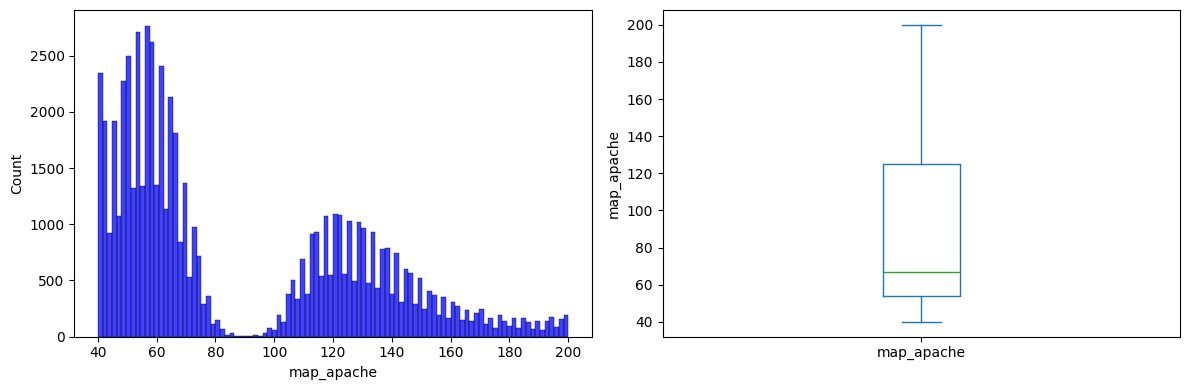

In [22]:
histograma("map_apache",dados)

* Na análise do gráfico univariado de pressão arterial percebemos que a maioria dos pacientes estão entre 40 e 80 de pressão arterial e que os outros estão distribuidos ao longo de de 110 a 200.  
O boxplot não possui pontos aberrantes e o grafico de barras nos mostra que a grande concentração de pessoas esta entre 40 e 60.

map_apache                                                 \
                    count       mean        std   min   25%   50%    75%   
hospital_death                                                             
0                 58036.0  88.649648  41.466745  40.0  55.0  67.0  124.0   
1                  5450.0  82.393578  47.850038  40.0  45.0  57.0  128.0   

                       
                  max  
hospital_death         
0               200.0  
1               200.0

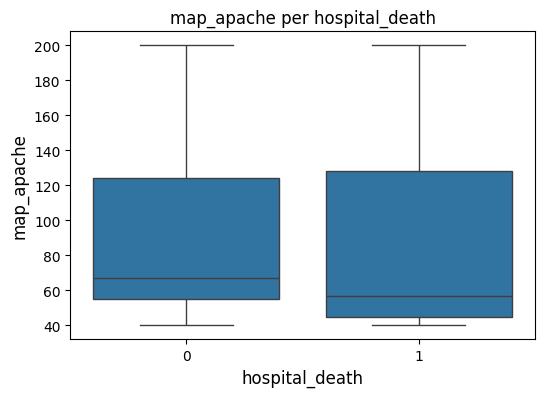

In [23]:
qualitativaXquantativa("map_apache","hospital_death",dados)

* Na análise do gráfico bivariado de pressão arterial obtemos melhores informações, no gráfico boxplot ainda não há pontos aberrantes no entanto vemos que os pacientes que vieram a obito possuem pressão arterial menos elevada em comparação as pessoas que não vieram a obito.  
Os pacientes que morreram possuem 6 pontos de media menor.

### 3.3 temp_apache (Temperatura corporal)

<bound method NDFrame.head of      temp_apache  Frequência
0          36.40    0.106361
1          36.60    0.096920
2          36.70    0.093219
3          36.30    0.075071
4          36.50    0.070766
..           ...         ...
177        35.11    0.000016
178        38.38    0.000016
179        32.16    0.000016
180        36.19    0.000016
181        33.61    0.000016

[182 rows x 2 columns]>

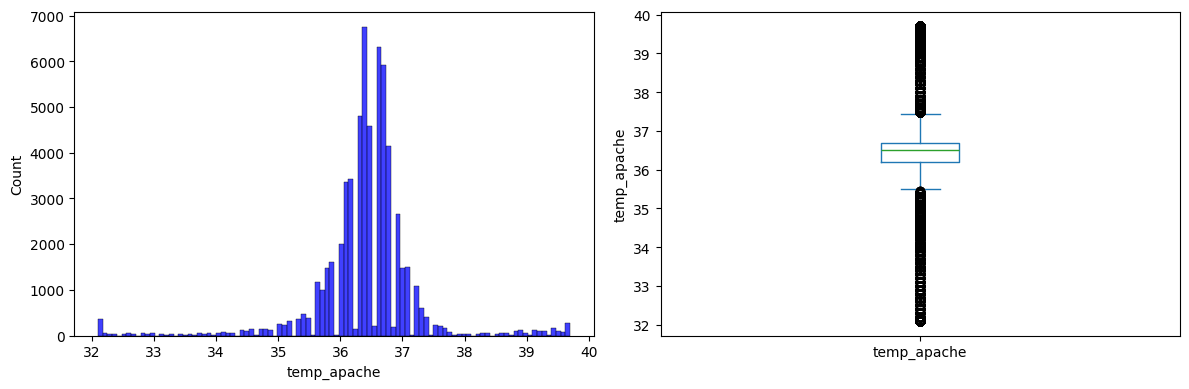

In [24]:
histograma("temp_apache",dados)

* No gráfico univariado de temperatura percebemos uma grande concentração entre 36 e 37 e varios pontos aberrantes tanto para baixo quanto para cima.  
A temperatura esperade tanto para pacientes idosos quanto pelo ministério da saúde é entre 36,1ºC e 37,2ºC.  
Portnato, vemos que a maioria dos pacientes estão com temperaturas consideradas normais.

temp_apache                                                  
                     count       mean      std   min   25%   50%   75%   max
hospital_death                                                              
0                  56199.0  36.453325  0.74005  32.1  36.2  36.5  36.7  39.7
1                   5130.0  35.990957  1.44767  32.1  35.6  36.3  36.7  39.7

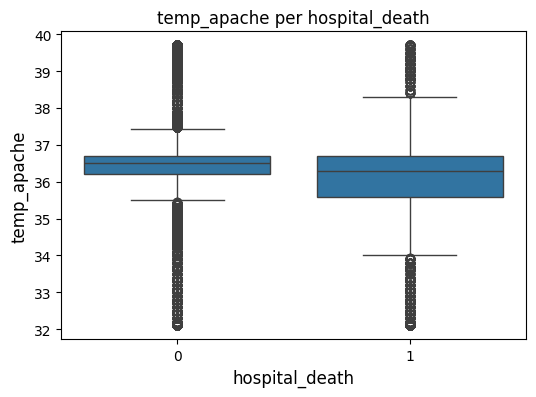

In [25]:
qualitativaXquantativa("temp_apache","hospital_death",dados)

* Na análise do gráfico bivariado de temperatura percebemos que os pacientes que vieram a obito tem valores abaixo do nivel de referencia sendo uma temperatura considerada baixa.  
Também percebemos que o boxplot daqueles que morreram é mais cheio, por causa que há maior variabilidade de temperatura.

### 3.4 resprate_apache (Frequência respiratoria)

<bound method NDFrame.head of     resprate_apache  Frequência
0              10.0    0.046992
1              12.0    0.046281
2              11.0    0.043991
3               4.0    0.039220
4               9.0    0.037388
..              ...         ...
64              5.9    0.000016
65             32.7    0.000016
66             33.6    0.000016
67              8.6    0.000016
68             26.5    0.000016

[69 rows x 2 columns]>

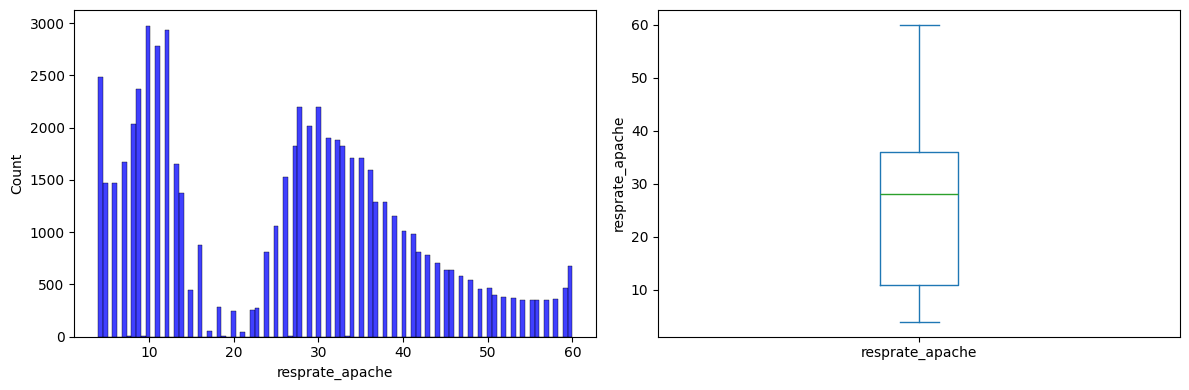

In [26]:
histograma("resprate_apache",dados)

* No gráfico univariado de frequeêcia respiratoria percebemos dois grandes pontos de concentração entre 5 e 15 e entre 25 e 40.  
Observamos tambem que no gráfico boxplot não há pontos aberrantes.  
A frequência respiratoria considerada normal no nosso grupo de interesse é entre 16 a 25 mrm e pelo ministerio da saude é de entre 16 e 20 mrpm.  
Portanto, pelos gráficos obtidos vemos que a os pacientes que possuem valores considerados normais é bem pequena, e que a maioria doos pacientes estão concetrados  em intervalos com valores abaixo do normal ou acima do normal.


resprate_apache                                               \
                         count       mean        std  min   25%   50%   75%   
hospital_death                                                                
0                      57856.0  25.421301  15.092625  4.0  11.0  27.0  36.0   
1                       5453.0  30.089474  14.698879  4.0  18.0  32.0  39.0   

                      
                 max  
hospital_death        
0               60.0  
1               60.0

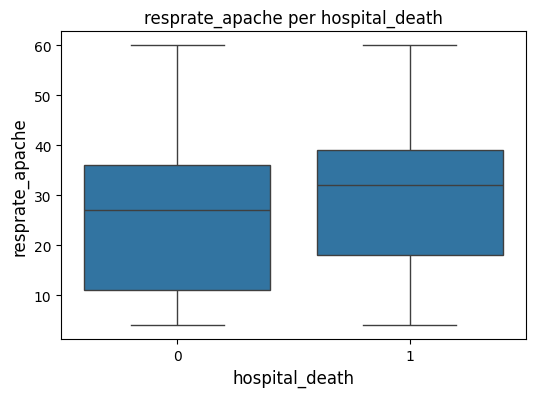

In [27]:
qualitativaXquantativa("resprate_apache","hospital_death",dados)

* No gráfico bivariado de frequencia respiratoria percebemos que a frequencia dos pacientes que vieram a obito é bem maior do que a esperada nos dois valores de referencia com 5 pontos a mais.

## 4. Medidas de posição e dispersão

* Breve introdução:  

As medidas de posição permitem inferir sobre o valor que a variável aleatória assumirá, ja as medidas de dispersão permitem medir quão confiáveis são estas inferências.  
As medidas analisadas aqui serão a moda, a media, a mediana, a variancia e o desvio padrão.  
A moda a média e a mediana são medidadas de posição e indicam:  
* moda é o valor que é mais observado na amostra.  
* média é a razão entre a soma dos valores observados e o número de valores observados, representa  o centro de gravidade da amostra.  
* mediana é o valor que se localiza no centro de uma amostra ordenada.   
O desvio padrão e variância sao medidas de dispersão e indicam:
* Desvio padrão 
*
Ja as variaveis analisadas serão as mesmas variaveis quantitativas analisadas, por terem relação com o diagnostico APACHE-III e fornecerem bons resultados sobre o estado do paciente.   
Como as variáveis de interesse nos fornece valores de referencia por faixas etarias é importante analisar as medidas de posição e dispersão por idade.  


In [28]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56119.0,61.727917,16.866711,16.0,52.0,64.0,75.0,89.0
1,5087.0,68.585610,14.445924,16.0,60.0,71.0,80.0,89.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,58659,61.727917,67.0,64.0,284.485951,16.866711,73.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,5540,68.58561,78.195652,71.0,208.684716,14.445924,73.0



Pelos dados obtidos podemos ver que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etária e também os valores de referência fornecidos pelo ministério da saúde.   
São eles:  
* Temperatura corporal: entre 35 º C e 36º C.  
* Frequência cardíaca (pulso): entre 60 e 90 bpm.  
* Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
* Respiração: entre 16 e 20 mrpm.  


### 3.1 heart_rate_apache

In [29]:
dataframe = dados
varName = "heart_rate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,58109.0,98.615739,30.339018,30.0,84.0,103.0,118.0,178.0
1,5465.0,110.411528,34.149646,30.0,96.0,115.0,133.0,178.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,58659,98.615739,100.0,103.0,920.455993,30.339018,148.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,5540,110.411528,30.0,115.0,1166.198293,34.149646,148.0


* Na análise das medidas de posição e dispersão da frequência cardíaca vemos uma média e mediana menor para os pacientes que permaneceram vivos e também um desvio padrâo e variância menor em relação aqueles que vieram a óbito.  
Porém, os pacientes que nao morreram estão com uma moda extramamente maior que aqueles que morreram.

### 3.2 map_apache

In [30]:
dataframe = dados
varName = "map_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,58036.0,88.649648,41.466745,40.0,55.0,67.0,124.0,200.0
1,5450.0,82.393578,47.850038,40.0,45.0,57.0,128.0,200.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,58659,88.649648,56.0,67.0,1719.49095,41.466745,160.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,5540,82.393578,40.0,57.0,2289.626129,47.850038,160.0


* Na análise das medidas de posição e dispersão da pressão arterial vemos que aqueles pacientes que permaneceram vivos tem medidas como média, moda e mediana maiores do que aqueles que vieram a óbito porem com variância e desvio padrão menores.  
Observamos também que das variáveis analisadas são aqueles que possuem maior variância e desvio padrão indicando a grande distância e variabilidade dos dados em ambas as categorias.

### 3.3 resprate_apache

In [31]:
dataframe = dados
varName = "resprate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,57856.0,25.421301,15.092625,4.0,11.0,27.0,36.0,60.0
1,5453.0,30.089474,14.698879,4.0,18.0,32.0,39.0,60.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,58659,25.421301,10.0,27.0,227.787334,15.092625,56.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,5540,30.089474,30.0,32.0,216.057035,14.698879,56.0


* Na análise das medidas de posição e dispersão da frequência respiratória vemos que os dados daqueles que permaneceram vivos tem medidas de média e e mediana menores daqueles que vieram a óbito mas que medidas como moda, variância e desvio padrão são bem maiores o que pode indicar uma grande variabilidade dos dados daqueles que permaneceram vivos.  
Tambem percebemos que as medidas tanto de variancia quanto desvio padrão sao altosem ambas as categorias.

### 3.4 temp_apache

In [32]:
dataframe = dados
varName = "temp_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56199.0,36.453325,0.74005,32.1,36.2,36.5,36.7,39.7
1,5130.0,35.990957,1.44767,32.1,35.6,36.3,36.7,39.7


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,58659,36.453325,36.4,36.5,0.547674,0.74005,7.6


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,5540,35.990957,36.4,36.3,2.09575,1.44767,7.6


* Na análise das medidas de posição e dispersão da temeperatura observamos que os pacientes com uma temperatura em torno da considerada normal são aqueles pacientes que permaneceram vivos com moda, mediana e média em torno de 36.5 e com variância e desvio padrão considerados baixos no nosso conjunto de dados, o que indica uma baixa variabilidade.  
Ademais, também percebemos que possuem variância e um desvio padrão menor em relação aos pacientes que vieram a óbito.Os pacientes que vieram a óbito tem uma média de temperatura menor que ja pode ser considerada fora do normal mas que possui mediana e moda não tão diferente daqueles que permaneceram vivos.